In [1]:
import pandas as pd

In [2]:
heart = pd.read_csv('clevelanda.csv')

In [3]:
heart.head() #first 5 rows

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
#Data Understanding Report

In [5]:
#i need to check the dimensions
heart.shape

(303, 14)

In [6]:
#checking for the information about data set
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [7]:
heart['ca'].value_counts()
#We are able to notice '4' records with '?', so how to treat them?

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [8]:
heart['thal'].value_counts()
#We are able to notice '2' records with '?', so how to treat them?

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [9]:
heart['class'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='count'>

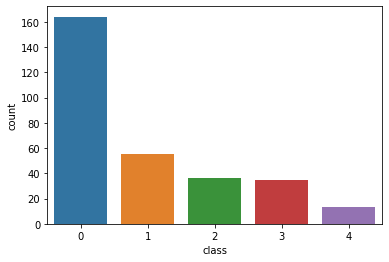

In [11]:
sns.countplot(heart['class'])
#We are able to notice huge amount of count on '0' class - 'Abs of heart die' our ML algorithm may get skewed due to
#insufficient data. 

<AxesSubplot:>

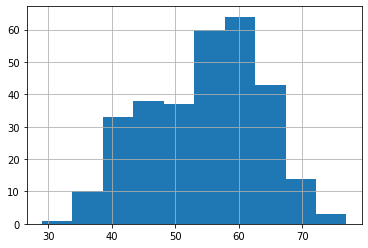

In [12]:
heart['age'].hist()

In [13]:
heart['age'].describe()
#Avg. Pat age is 54 and min - 29, max 77 and most of the pat are around 55-60
#Is it similar to your real time data??

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [14]:
from scipy.stats import skew

In [15]:
skew(heart['age'])

-0.2080240895050745

In [16]:
from scipy.stats import kurtosis

In [17]:
kurtosis(heart['age'])

-0.5345227201725988

In [21]:
import numpy as np
heart.pivot_table(values=["age","trestbps",'thalach'], index=["class","gender"], aggfunc=np.mean)

age     thalach    trestbps
class gender                                   
0     0       54.555556  154.027778  128.736111
      1       51.043478  161.782609  129.652174
1     0       60.333333  152.777778  139.888889
      1       54.413043  144.586957  131.956522
2     0       55.285714  127.714286  144.857143
      1       58.689655  137.482759  131.620690
3     0       59.857143  148.857143  156.000000
      1       55.035714  127.857143  130.321429
4     0       64.000000  134.000000  150.000000
      1       58.909091  141.818182  136.727273

<AxesSubplot:xlabel='age', ylabel='trestbps'>

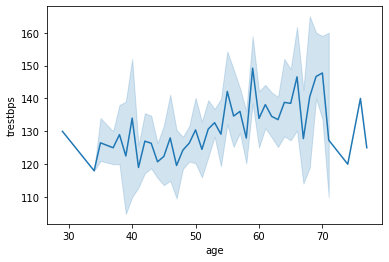

In [22]:
sns.lineplot(x = heart['age'], y = heart['trestbps'])

<AxesSubplot:xlabel='age', ylabel='thalach'>

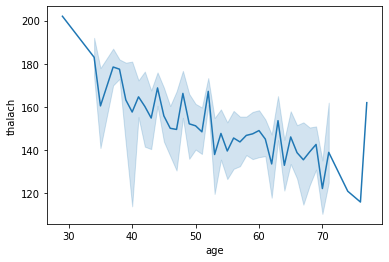

In [23]:
sns.lineplot(x = heart['age'], y = heart['thalach'])

<AxesSubplot:>

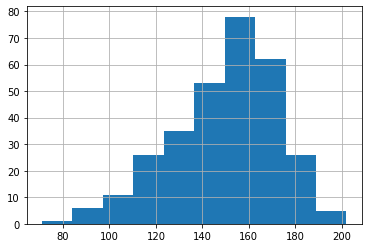

In [24]:
heart['thalach'].hist()

<AxesSubplot:xlabel='thalach'>

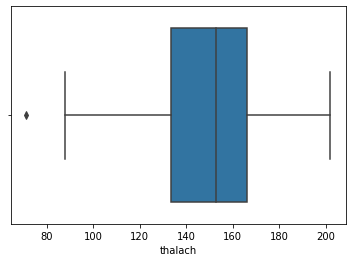

In [25]:
sns.boxplot(heart['thalach'])

In [26]:
heart['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64